In [10]:
import os
import pandas as pd

In [11]:
data_path = '../../../Data/al_test_experiments/Evolvepro'

In [ ]:
file_path = os.path.join(data_path, 'Source.xlsx')
sheet_name = 'MAPK1'

dataframe = pd.read_excel(file_path, sheet_name=sheet_name) if isinstance(sheet_name, str) else pd.read_excel(file_path)

In [ ]:
temp = [var[:-1] for var in dataframe['variant']]
wts = []
for i in temp:
    if i not in wts:
        wts.append(i)

assert len(wts) == len(set(wts))

wt = ''.join([var[0] for var in wts])
nos = [int(var[1:]) for var in wts]

In [ ]:
for i, n in enumerate(nos):
    assert i+1 == n

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

## taken from https://github.com/mat10d/EvolvePro
def generate_wt(wt_sequence, output_file):
    """
    Generate a FASTA file containing the wild-type protein sequence.

    Args:
        wt_sequence (str): Wild-type protein sequence.
        output_file (str): Path to the output FASTA file.
    """
    # Create a SeqRecord object of the wild-type sequence
    record = SeqRecord(Seq(wt_sequence), id="brenan_WT", description="brenan_WT")

    # Write the SeqRecord object to a FASTA file
    with open(output_file, "w") as handle:
        SeqIO.write(record, handle, "fasta")

In [ ]:
# generate_wt(wt, os.path.join(data_path, 'brenan_WT.fasta'))

In [12]:
import sys
sys.path.append('../..')

In [13]:
from DomainPrediction.utils import helper

In [14]:
file_path = os.path.join(data_path, 'evolvepro.xlsx')
sheet_name = 'brenan_labels'

dataframe = pd.read_excel(file_path, sheet_name=sheet_name) if isinstance(sheet_name, str) else pd.read_excel(file_path)

In [15]:
file_path = os.path.join(data_path, 'brenan_WT.fasta')
wt_str = helper.read_fasta(file=file_path, mode='str')[0]

In [16]:
temp = []
for i, row in dataframe[['variant', 'fitness_scaled']].iterrows():
    mut = row['variant']
    fitness = row['fitness_scaled']
    wt_aa = mut[0]
    mt_aa = mut[-1]
    pos_aa = int(mut[1:-1])

    wt_list = list(wt_str)
    assert wt_list[pos_aa-1] == wt_aa

    wt_list[pos_aa-1] = mt_aa

    seq = ''.join(wt_list)

    temp.append([seq, fitness])

In [19]:
len(temp)

6810

In [21]:
## Save files csv
df = pd.DataFrame(temp, columns=['seq', 'function'])

In [22]:
df.head()

,seq,function
0,MCAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,0.265834
1,MDAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,0.397712
2,MEAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,0.324874
3,MFAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,0.151913
4,MGAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,0.261203


In [23]:
# df.to_csv(os.path.join(data_path, 'brenan.csv'), index=False)

<Axes: >

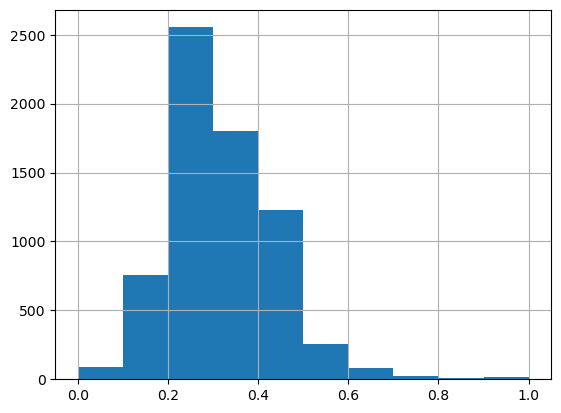

In [24]:
df['function'].hist()